In [18]:
import gspread
account = gspread.service_account("credentials.json")

In [19]:
spreadsheet = account.open("KK - in/output")

In [20]:
input = spreadsheet.worksheet("Input")
output = spreadsheet.worksheet("Output")

In [21]:
input_list = [{'bins': int(bins) , 'items': [int(item) for item in items.split(',')] }
                 for bins, items in input.get_all_values()[1:]]

In [22]:
# should import/install prtpy
from prtpy.partitioning.kk import kk 
from prtpy.partitioning import partition

output_rows = []
for row in input_list:
    bins, items = row['bins'], row['items']
    part = partition(algorithm=kk, numbins=bins, items=items)
    output_rows.append([bins, str(items), str(part)])

range_to_update = "A2:C"+str(len(input_list)+1)

output.update(range_to_update, output_rows)

{'spreadsheetId': '10jSIOFba6vjk1U-C7N6p-8LHTXeFFch8Ui68MOXoUa4',
 'updatedRange': 'Output!A2:C6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}

# input examples

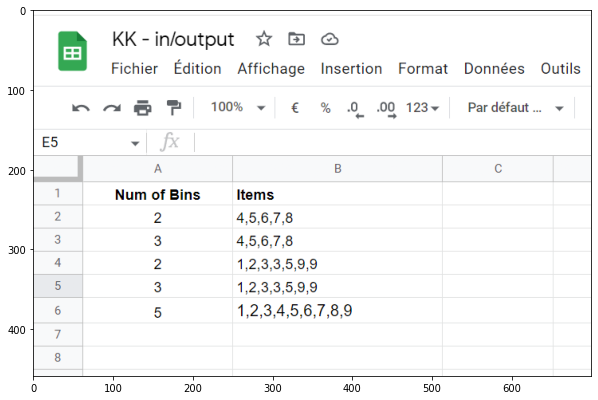

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(plt.imread('input.png'))

# output examples

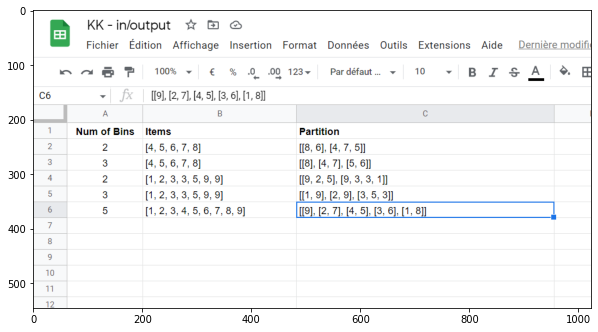

In [29]:
plt.figure(figsize = (10,10))
plt.imshow(plt.imread('output.png'))